# **Tratamento de Dados das Ações**

- Diogo Nunes Batista
- Rafael de Oliveira Évora
- Vinicius Gabriel 

### Carregamento dos dados

In [5]:
import pandas
import numpy as np

df_stocks_types = {
    'ABERTURA': np.float64,
    'FECHAMENTO': np.float64,
    'VARIAÇÃO': np.float64,
    'MÍNIMO': np.float64,
    'MÁXIMO': np.float64,
    'VOLUME': str
}

df_selic_types = {
    'valor': np.float64,
}

STOCK_NAME = 'IRBR3'

df_stocks = pandas.read_csv(f'data/raw/{STOCK_NAME}.csv', index_col="DATA" , dtype=df_stocks_types, decimal=',')

df_selic = pandas.read_csv('data/raw/selic.csv', sep=';', index_col="data",  dtype=df_selic_types , decimal=',')

df_stocks, df_selic

(            ABERTURA  FECHAMENTO  VARIAÇÃO  MÍNIMO  MÁXIMO   VOLUME
 DATA                                                               
 25/10/2024     44.66       41.35     -6.49   41.32   44.95   99,31M
 24/10/2024     47.91       44.22     -7.32   44.22   48.45  126,76M
 23/10/2024     42.80       47.71     12.29   42.68   48.15  153,65M
 22/10/2024     42.45       42.49      0.07   41.59   42.53   25,37M
 21/10/2024     41.86       42.46      1.94   41.61   42.56   28,14M
 ...              ...         ...       ...     ...     ...      ...
 02/05/2024     43.37       43.75      2.99   43.19   44.78   90,85M
 30/04/2024     42.98       42.48     -1.26   42.29   43.78   65,25M
 29/04/2024     42.15       43.02      1.58   41.53   43.27   39,72M
 26/04/2024     41.53       42.35      2.69   41.25   42.76   54,96M
 25/04/2024     40.80       41.24      1.18   40.30   41.40   44,64M
 
 [129 rows x 6 columns],
                valor
 data                
 03/01/2022  0.034749
 04/01/202

### Tratamento dos dados

In [6]:
df_selic.rename(columns={'valor': 'SELIC'}, inplace=True)
df_selic['SELIC'] = df_selic['SELIC']

df_stocks['VOLUME'] = df_stocks['VOLUME'].str.replace('M', '').str.replace(',', '.').astype(np.float64) # Remove 'M' e subtitui ',' por '.' o que possibilita a conversão para float

df = df_stocks.join(df_selic, how='inner') # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

df = df.iloc[::-1]

df

,ABERTURA,FECHAMENTO,VARIAÇÃO,MÍNIMO,MÁXIMO,VOLUME,SELIC
25/04/2024,40.80,41.24,1.18,40.30,41.40,44.64,0.040168
26/04/2024,41.53,42.35,2.69,41.25,42.76,54.96,0.040168
29/04/2024,42.15,43.02,1.58,41.53,43.27,39.72,0.040168
30/04/2024,42.98,42.48,-1.26,42.29,43.78,65.25,0.040168
02/05/2024,43.37,43.75,2.99,43.19,44.78,90.85,0.040168
...,...,...,...,...,...,...,...
21/10/2024,41.86,42.46,1.94,41.61,42.56,28.14,0.040168
22/10/2024,42.45,42.49,0.07,41.59,42.53,25.37,0.040168
23/10/2024,42.80,47.71,12.29,42.68,48.15,153.65,0.040168
24/10/2024,47.91,44.22,-7.32,44.22,48.45,126.76,0.040168


### Plotando

C:\Users\Diogo\AppData\Local\Temp\ipykernel_12500\2736737018.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.get_figure().show()


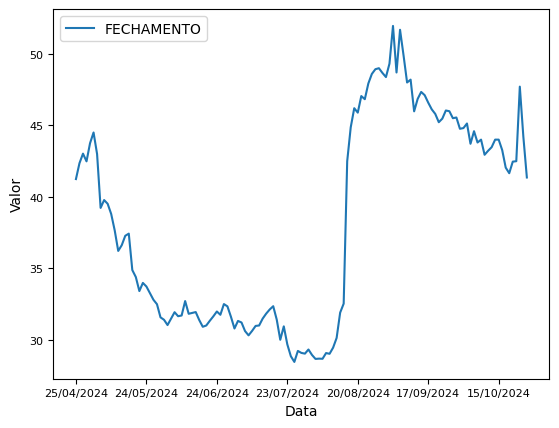

In [7]:
ax = df.plot(y='FECHAMENTO', xlabel='Data', ylabel='Valor', fontsize=8)
ax.get_figure().show()

### Normalização

In [8]:
df[['ABERTURA', 'FECHAMENTO', 'MÍNIMO', 'MÁXIMO']] = df[['ABERTURA', 'FECHAMENTO', 'MÍNIMO', 'MÁXIMO']].div(100.0)
df['VOLUME'] = df['VOLUME'].div(1000.0)
df['VARIAÇÃO'] = df['VARIAÇÃO'].add(100.0).div(1000.0)

df.to_csv(f'data/final/{STOCK_NAME}.csv', index_label='DATA', sep=';', decimal='.')